# Heart disease EDA, classification and understanding

## Dataset used: https://www.kaggle.com/ronitf/heart-disease-uci

## Features:

#### https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877

#### 1. age
#### 2. sex (0 female, 1 male)
#### 3. chest pain type (4 values) (severity level of the chest pain)
#### 4. resting blood pressure
#### 5. serum cholestoral in mg/dl (the serum cholestoral level of the patient)
#### 6. fasting blood sugar > 120 mg/dl (if the patients blood sugar when fasting is greater than 120)
#### 7. resting electrocardiographic results (values 0,1,2) (results of the patient after an electrocardiography process)
#### 8. maximum heart rate achieved
#### 9. exercise induced angina (whether the patient experienced execercise induced angina)
#### 10. oldpeak = ST depression induced by exercise relative to rest
#### 11. the slope of the peak exercise ST segment
#### 12. number of major vessels (0-3) colored by flourosopy (shows up on the scan)
#### 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Questions:

#### - What age group is most at risk of heart disease?
#### - Is heart disease commonly reversable?
#### - What gender is most at risk of heart disease?

### Loading the data
We will load in the data from the CSV, and will then rename the columns for ease of use, as well as inverting the 'has_heart_disease' column, as it was originally 0 for has heart disease and 1 for no heart disease.

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv') # Read in the data from the CSV into a dataframe
df.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestoral", "fasting_blood_sugar>120", "electrocardiographic_results", 
              "max_heart_rate", "excercise_induced_angina", "st_depression_while_resting", "excercise_st_segment_slope", "flouroscopy_colored_vessels", 
              "defect_type", "has_heart_disease"] # Rename the columns
df['has_heart_disease'] = 1 - df['has_heart_disease'] # Invert the 1's and 0's for the has heart disease column
df.head(3) # Display the first 3 rows of the data

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar>120,electrocardiographic_results,max_heart_rate,excercise_induced_angina,st_depression_while_resting,excercise_st_segment_slope,flouroscopy_colored_vessels,defect_type,has_heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0


### Understand the data
This section will give us a basic understanding of the data such as checking for missing values, observing the types of each column and observing the shape of the data.

In [2]:
df.info() # Display the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                             303 non-null int64
sex                             303 non-null int64
chest_pain_type                 303 non-null int64
resting_blood_pressure          303 non-null int64
serum_cholestoral               303 non-null int64
fasting_blood_sugar>120         303 non-null int64
electrocardiographic_results    303 non-null int64
max_heart_rate                  303 non-null int64
excercise_induced_angina        303 non-null int64
st_depression_while_resting     303 non-null float64
excercise_st_segment_slope      303 non-null int64
flouroscopy_colored_vessels     303 non-null int64
defect_type                     303 non-null int64
has_heart_disease               303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.describe() # Provide us with the numerical details of each column

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar>120,electrocardiographic_results,max_heart_rate,excercise_induced_angina,st_depression_while_resting,excercise_st_segment_slope,flouroscopy_colored_vessels,defect_type,has_heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.455446
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Viewing correlations in the data
Here we will observe the correlations between features in the dataset to help us find related features for our model and visualizations.

Text(0.5, 1, 'Correlations')

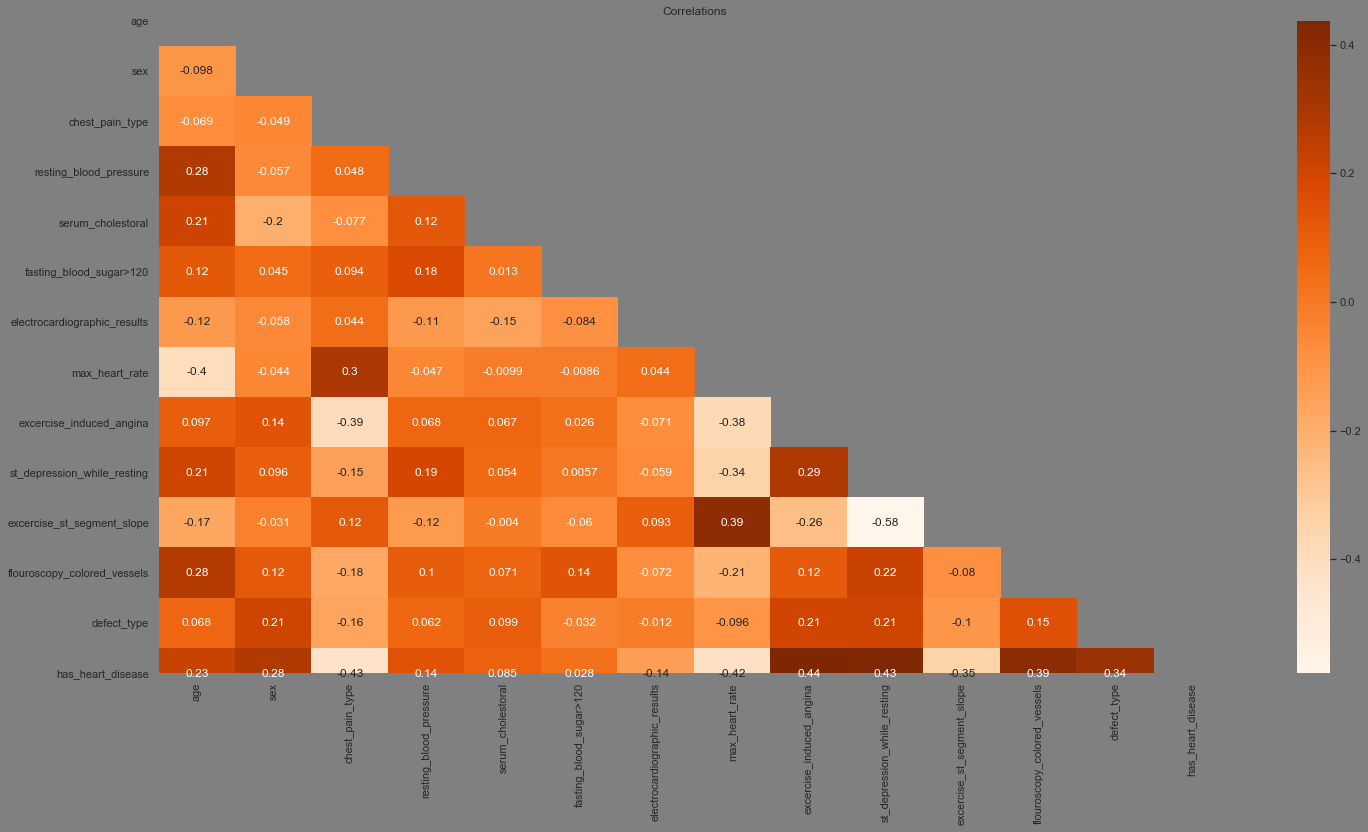

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid") # Set the seaborn color theme

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.rcParams["figure.figsize"] = (24,12) # Change the size of the plot
sns.set(rc={'axes.facecolor': 'gray', 'figure.facecolor': 'gray'})
cor_heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap='Oranges')
cor_heatmap.set_title('Correlations')

We will define a strong correlation as anything above 0.25 or below -0.25

Strong positive correlations:
 - age and resting_blood_pressure
 - age and flouroscopy_colored_vessels
 - sex and has_heart_disease
 - chest_pain_type and max_heart_rate
 - max_heart_rate and excercise_st_segment_slope
 - excercise_induced_angina and has_heart_disease
 - excercise_induced_angina and st_depression_while_resting
 - st_depression_while_resting and has_heart_disease
 - flouroscopy_colored_vessels and has_heart_disease
 - defect_type and has_heart_disease
 
Strong negative correlations:
 - age and max_heart_rate
 - chest_pain_type and has_heart_disease
 - chest_pain_type and excercise_induced_angina
 - max_heart_rate and has_heart_disease
 - max_heart_rate and st_depression_while_resting
 - max_heart_rate and excercise_induced_angina
 - excercise_induced_angina and excercise_st_segment_slope
 - st_depression_while_resting and excercise_st_segment_slope
 - excercise_st_segment_slope and has_heart_disease

### Displaying the distributions of features and finding categorical variables
Plot the distributions of the data of each feature using a histogram so we can observe how each feature is distributed, allowing us to identify continuous features and categorical features.

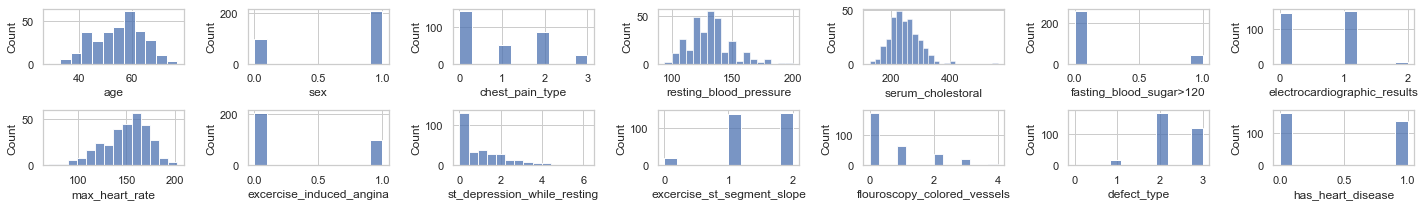

In [5]:
plt.rcParams["figure.figsize"] = (20,3) # Change the size of the plots
sns.set_theme(style="whitegrid") # Set the seaborn color theme

_, axes = plt.subplots(2, 7) # Create the layout for the histograms

for i, col in enumerate(df.columns): # Enumerate over the columns
    sns.histplot(data=df, x=col, ax=axes[i // 7, i % 7]) # Plot the histogram of the feature
plt.tight_layout() # Display the grid

In [6]:
print("Column: Unique categorical values") # Print out the label
for col in ['sex', 'chest_pain_type', 'fasting_blood_sugar>120', 'electrocardiographic_results', 'excercise_induced_angina',
            'excercise_st_segment_slope', 'flouroscopy_colored_vessels', 'defect_type', 'has_heart_disease']: # Iterate over the columns in this list
    print(f"{col}: {df[col].unique()}") # Print the unique values for each categorical value

Column: Unique categorical values
sex: [1 0]
chest_pain_type: [3 2 1 0]
fasting_blood_sugar>120: [1 0]
electrocardiographic_results: [0 1 2]
excercise_induced_angina: [0 1]
excercise_st_segment_slope: [0 2 1]
flouroscopy_colored_vessels: [0 2 1 3 4]
defect_type: [1 2 3 0]
has_heart_disease: [0 1]


### What age group is most at risk of heart disease?
Let's find out what age groups had the most occurances of heart disease, and find the rate of contracting heart disease for each age group.

Text(0.5, 1.0, 'Age groups of heart disease')

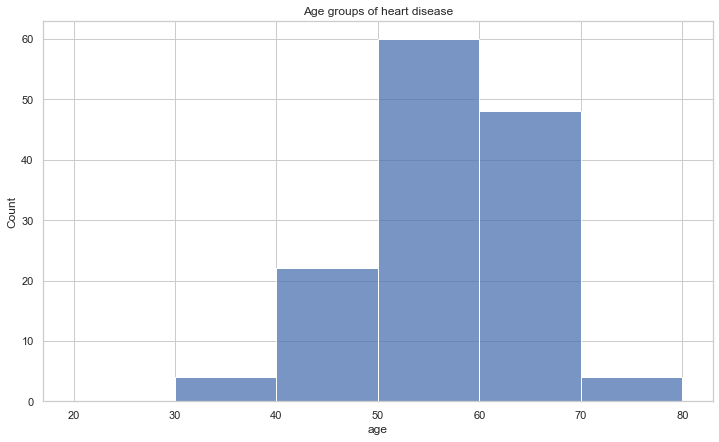

In [7]:
plt.rcParams["figure.figsize"] = (12,7) # Set the plot size for this plot
graph = sns.histplot(df[df['has_heart_disease'] == 1], x='age', bins=[20, 30, 40, 50, 60, 70, 80]) # Plot the histogram of the age with bins every 10 years from 20 to 80
graph.set_title('Age groups of heart disease') # Set the title for the plot

We can see that most of the occurances of heart disease occured within patients who were over between 50-70 years of age. It is seemily perciular that this trend does not continue and falls flat for 70-80 year olds, which is hypothesized to be due to a lack of recorded data for those in their 70's.

Text(0.5, 1.0, 'Heart disease rate for different age groups')

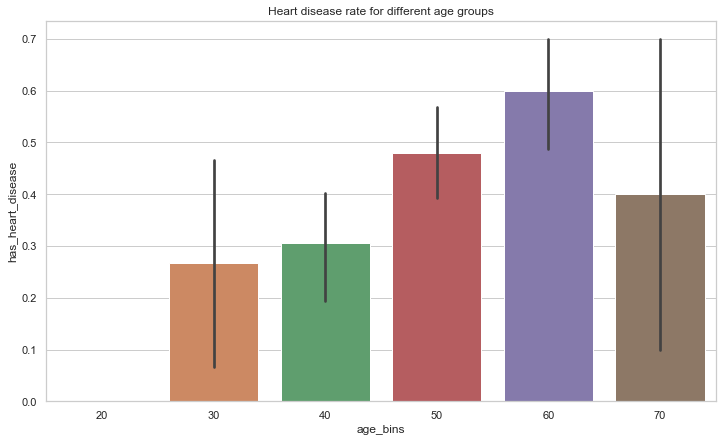

In [8]:
df['age_bins'] = df['age'].apply(lambda x: (x // 10) * 10) # Organize the ages into bins of 10 years starting from 20 to 80

graph = sns.barplot(data=df, x='age_bins', y='has_heart_disease') # Plot a bar chart of the those who have heart disease vs their age
graph.set_title('Heart disease rate for different age groups') # Set the title for the plot

The trend within the bar chart demonstrates that as age increases, the chance of a patient getting heart disease does too. This trend fails for patients within 70 years old, which is hypothesized to be due to a lack of data for patients who had an age greater than 70, as demonstrated by the large range of the confidence interval denoted by the black line.

To conclude this section it can be seen that patients 50 years and above are at the highest risk of contracting heart disease and contract heart disease the most, and therefore should take appropriate measures to prevent it, and should get regular checkups.

### Is heart disease commonly reversable?

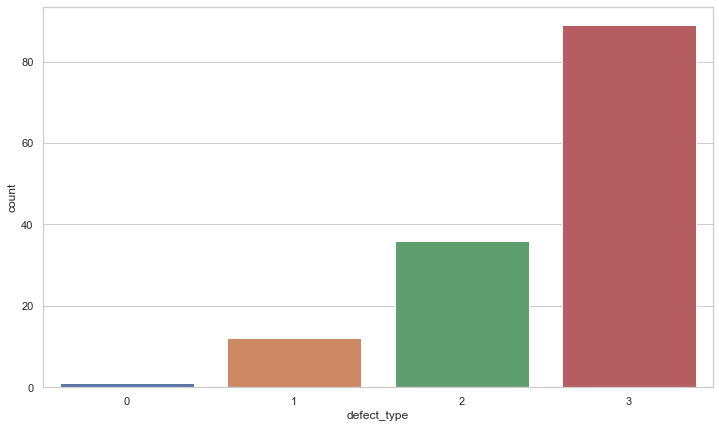

In [9]:
graph = sns.countplot(data=df[df['has_heart_disease'] == 1], x='defect_type') # Plot a histogram of those who have heart disease and the defect type of their heart disease

It can be seen that out of all cases of heart disease recorderd, a large majority of the cases were reversable (3), and only a very small majority of the cases were non reversable (1).

### What gender is most at risk of heart disease?

Text(0.5, 1.0, 'Genders of heart disease')

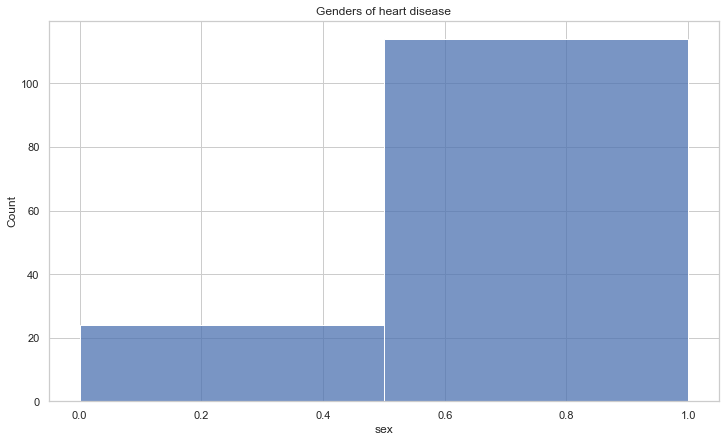

In [10]:
graph = sns.histplot(df[df['has_heart_disease'] == 1], x='sex', bins=2) # Plot a histogram of the ages that contracted heart disease
graph.set_title('Genders of heart disease') # Give the plot a title

It can be seen that males heart disease occured most frequently within males (1) by a significant margin compared to females (0). This is hypothesized due to the fact that males are much more likely to smoke cigarettes and drink alcohol which are known contibutors to heart disease.

Text(0.5, 1.0, 'Heart disease rate for different genders')

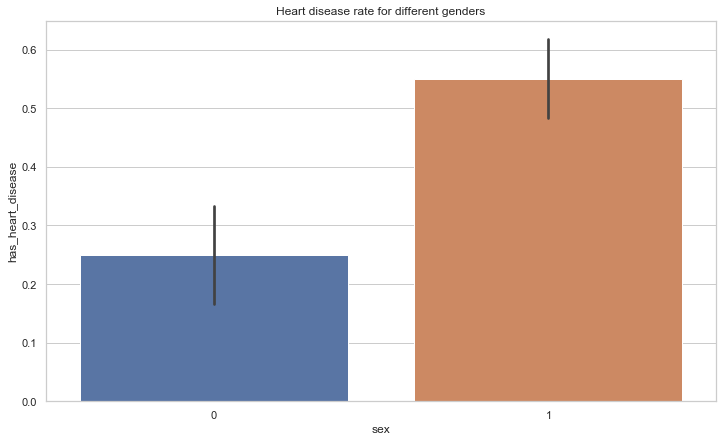

In [11]:
graph = sns.barplot(data=df, x='sex', y='has_heart_disease') # Plot a bar chart of heart disease rate against sex/gender
graph.set_title('Heart disease rate for different genders') # Give the plot a title

It can be seen that this data portrays that the chance of contracting heart disease is much greater in males than females.

### Preprocess data for model
Nowe we will process the data so that it can be used for the training of the model.

In [12]:
df.head(3) # Display the feature columns

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar>120,electrocardiographic_results,max_heart_rate,excercise_induced_angina,st_depression_while_resting,excercise_st_segment_slope,flouroscopy_colored_vessels,defect_type,has_heart_disease,age_bins
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,60
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0,30
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0,40


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

random_state = 2 # Set the random seed for reproducability

def pipeline(df, k): # Create the data processing pipeline to create k folds of data
    feature_df = df.drop(['age'], axis=1) # Drop the age column and create a new df
    feature_df.drop('defect_type', axis=1, inplace=True) # Drop the original defect_type feature
    
    # This process is safe to do across the entire dataset at once and will result in no data leakage
    oh1 = pd.get_dummies(feature_df['excercise_st_segment_slope'], prefix='st_seg_slope') # One hot encode the excercise_st_segment_slope feature
    feature_df.drop('excercise_st_segment_slope', axis=1, inplace=True) # Drop the original excercise_st_segment_slope feature
    oh2 = pd.get_dummies(feature_df['chest_pain_type'], prefix='chest_pain_type') # One hot encode the chest_pain_type feature
    feature_df.drop('chest_pain_type', axis=1, inplace=True) # Drop the original chest_pain_type feature
    oh3 = pd.get_dummies(feature_df['flouroscopy_colored_vessels'], prefix='flouroscopy_colored_vessels') # One hot encode the flouroscopy_colored_vessels feature
    feature_df.drop('flouroscopy_colored_vessels', axis=1, inplace=True) # Drop the original flouroscopy_colored_vessels feature

    feature_df = pd.concat([feature_df, oh1, oh2, oh3], axis=1) # Concatenate the one hot encoding features with the main df

    folds = [] # The list that will store the folded training and validation sets
    
    kf = KFold(n_splits=k, shuffle=True, random_state=3) # Create a KFold object
    for train_index, valid_index in kf.split(feature_df): # Split the training data into k folds
        train_df = feature_df.iloc[train_index] # Get the training split
        valid_df = feature_df.iloc[valid_index] # Get the validation split

        s_c_mean = train_df['serum_cholestoral'].mean() # Get the mean of serum_cholestoral for the training data
        s_c_std = train_df['serum_cholestoral'].std() # Get the standard deviation of serum_cholestoral for the training data
        r_b_p_mean = train_df['resting_blood_pressure'].mean() # Get the mean of resting_blood_pressure for the training data
        r_b_p_std = train_df['resting_blood_pressure'].std() # Get the standard deviation of resting_blood_pressure for the training data
        m_h_r_mean = train_df['max_heart_rate'].mean() # Get the mean of max_heart_rate for the training data
        m_h_r_std = train_df['max_heart_rate'].std() # Get the standard deviation of max_heart_rate for the training data
        st_d_w_r_mean = train_df['st_depression_while_resting'].mean() # Get the mean of st_depression_while_resting for the training data
        st_d_w_r_std = train_df['st_depression_while_resting'].std() # Get the standard deviation of st_depression_while_resting for the training data

        train_df['serum_cholestoral'] = (train_df['serum_cholestoral'] - s_c_mean) / s_c_std # Calculate the z scores for serum_cholestoral of the training data
        train_df['resting_blood_pressure'] = (train_df['resting_blood_pressure'] - r_b_p_mean) / r_b_p_std # Calculate the z scores for resting_blood_pressure of the training data
        train_df['max_heart_rate'] = (train_df['max_heart_rate'] - m_h_r_mean) / m_h_r_std # Calculate the z scores for max_heart_rate of the training data
        train_df['st_depression_while_resting'] = (train_df['st_depression_while_resting'] - st_d_w_r_mean) / st_d_w_r_std # Calculate the z scores for st_depression_while_resting of the training data

        valid_df['serum_cholestoral'] = (valid_df['serum_cholestoral'] - s_c_mean) / s_c_std # Calculate the z scores for serum_cholestoral of the validation data
        valid_df['resting_blood_pressure'] = (valid_df['resting_blood_pressure'] - r_b_p_mean) / r_b_p_std # Calculate the z scores for resting_blood_pressure of the validation data
        valid_df['max_heart_rate'] = (valid_df['max_heart_rate'] - m_h_r_mean) / m_h_r_std # Calculate the z scores for max_heart_rate of the validation data
        valid_df['st_depression_while_resting'] = (valid_df['st_depression_while_resting'] - st_d_w_r_mean) / st_d_w_r_std # Calculate the z scores for st_depression_while_resting of the validation data

        train_Y = train_df['has_heart_disease'] # Extract the train labels from the data
        train_X = train_df.drop('has_heart_disease', axis=1) # Remove the train labels from the input data
        
        valid_Y = valid_df['has_heart_disease'] # Extract the validation labels from the data
        valid_X = valid_df.drop('has_heart_disease', axis=1) # Remove the validation labels from the input data
        
        folds.append(((train_X, train_Y), (valid_X, valid_Y))) # Add the features and labels for the train set and validation set to the folds list
        
    print(f"Training examples: {len(folds[0][0][0])} | Validation examples: {len(folds[0][1][0])}") # Print out the size of the training data and validation data
    
    return folds # Return the folds list
    
folds = pipeline(df, 10) # Create 10 folds from the df dataframe

Training examples: 272 | Validation examples: 31


### Model building
Here we will build and train a Random Forrest classifier using our training data that will be responsible for classifying heart disease. We will then validate the model using K-Fold cross validation.

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# How does cross validation work

def crossValidation(folds): # Create the function to train and cross validate our models
    models = [] # Create a list to store the trained models
    scores = [] # Create a list to store the scores made by each model
    valid_folds = [] # Create the list where the validation data from the folds will be stored
    
    for fold in folds: # Iterate over each fold
        model = RandomForestClassifier(random_state=random_state) # Create a new model for each fold
        
        (train_X, train_Y), (valid_X, valid_Y) = fold # Unpackage the data from the fold
        
        model.fit(train_X, train_Y) # Train the model using the test data
        
        score = model.score(valid_X, valid_Y) # Validate the model on the validation data and get the score
        
        models.append(model) # Add this model to our models list
        scores.append(score) # Add this score to our scores list
        valid_folds.append((valid_X, valid_Y)) # Append the validation data to the valid folds list
        
    avg_score = np.mean(scores) # Get the mean score
    best_model = models[np.argmax(scores)] # Select the best model
    best_fold = valid_folds[np.argmax(scores)] # Select the fold that produced the best score
    best_score = np.max(scores) # Select the highest score
    
    print(f"Average score: {avg_score}% accuracy | Best score: {best_score}% accuracy") # Print out the average score and the highest score achieved by a model
    
    return best_model, best_fold # Return the best model
        
best_model, best_fold = crossValidation(folds) # Cross validate and return the best model

model_path = ".\\model\\model.p" # The relative path to where the model will be saved
pickle.dump(best_model, open(model_path, 'wb')) # Pickle the model and save it

Average score: 0.8248387096774193% accuracy | Best score: 0.9333333333333333% accuracy


### Interpreting the model and extracting insights from it
This section we will use the model to help us determine the most import features when predicting heart disease within a patient. This information can be shared with dosctors to help their decisions and consideration of different features of a patient when classifying if they have heart disease.

In [15]:
import eli5

valid_X, valid_Y = best_fold # Extract the validation features and labels from the fold

perm = eli5.sklearn.PermutationImportance(best_model).fit(valid_X, valid_Y) # Perform the permutation importance process
eli5.show_weights(perm, feature_names=valid_X.columns.tolist())  # Display the importances of each feature

Weight,Feature
0.1133 ± 0.1083,flouroscopy_colored_vessels_0
0.0867 ± 0.0533,excercise_induced_angina
0.0867 ± 0.0533,chest_pain_type_0
0.0533 ± 0.0327,max_heart_rate
0.0467 ± 0.0533,serum_cholestoral
0.0333 ± 0.0596,sex
0.0333 ± 0.0422,resting_blood_pressure
0.0333 ± 0.0000,flouroscopy_colored_vessels_1
0.0267 ± 0.0267,st_seg_slope_1
0.0267 ± 0.0499,st_depression_while_resting


This permutation importance plot demonstrates the most important features the model has identified when classifying heart disease. The features in green at the top are most important in classifying heart disease, compared to the ones at the bottom.

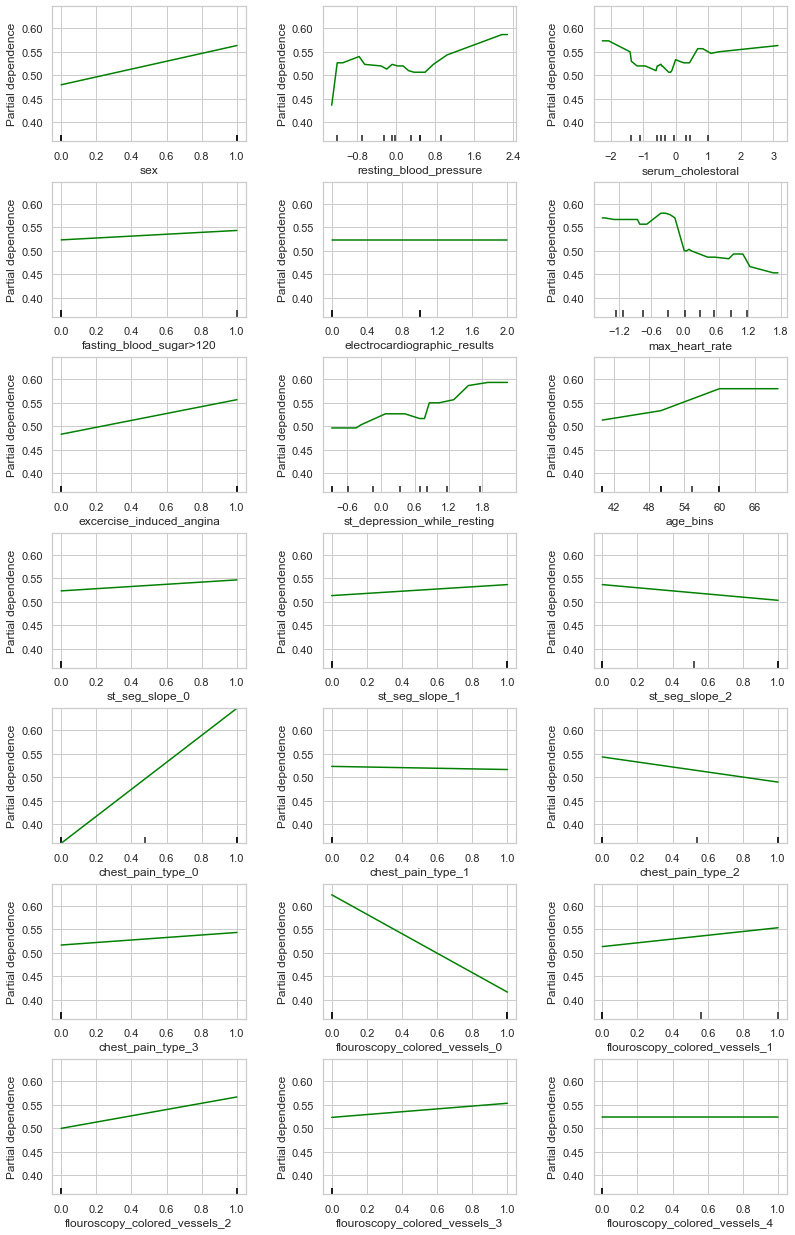

In [16]:
from sklearn.inspection import partial_dependence, plot_partial_dependence

# https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html - 2d is possible

fig = plt.figure(figsize=(12, 30)) # Set the figure size of each plot
plot_partial_dependence(best_model, valid_X, list(range(len(valid_X.columns))), fig=fig, feature_names=valid_X.columns) # Create a dependency plot for each feature in the dataset

This dependence plot demonstrates how each variable independently affects the prediction of it a patient has heart disease or not.
##### Where is the plot for the bottom right???

In [22]:
import shap

pred_data = valid_X.iloc[11] # Select a row of data from the validation feature set

explainer = shap.TreeExplainer(best_model) # Create a shap explainer

shap_values_single = explainer.shap_values(pred_data) # Create the positive and negative shap values for our selected data

shap.initjs() # Initialize js visualization code
shap.force_plot(explainer.expected_value[1], shap_values_single[1], pred_data) # Observe the features impacts on the baseline

Explain the SHAP values here

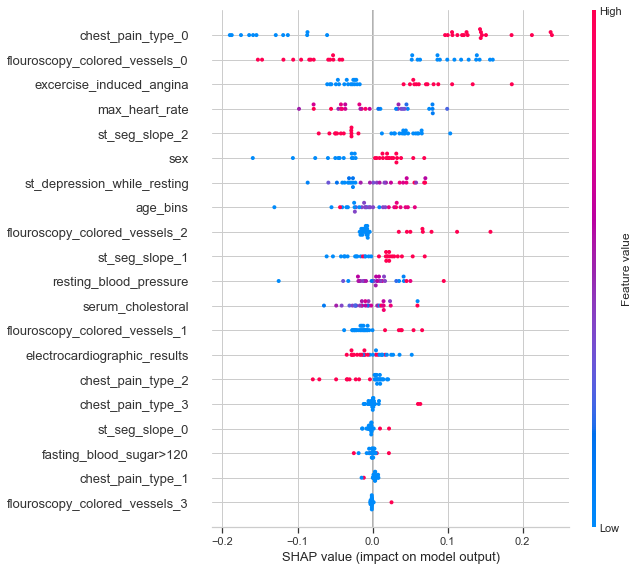

In [18]:
shap_values_all = explainer.shap_values(valid_X) # Create shap values for all rows in the validation feature set

shap.summary_plot(shap_values_all[1], valid_X) # Plot a summary of the shap values for each row in the validation set

Explain these shap values